Train shape: (60000, 784) (60000,)
Test shape: (10000, 784) (10000,)


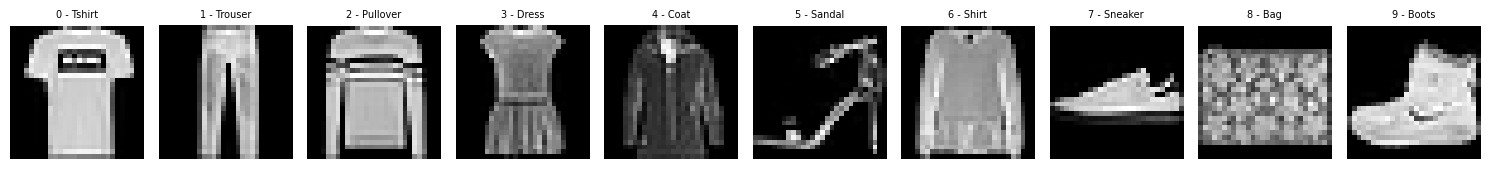

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets


mnist_train = datasets.FashionMNIST(root="./data", train=True, download=True, transform=None)
mnist_test  = datasets.FashionMNIST(root="./data", train=False, download=True, transform=None)


X_train = mnist_train.data.to(torch.float32).numpy()
y_train = mnist_train.targets.to(torch.int64).numpy()

X_test  = mnist_test.data.to(torch.float32).numpy()
y_test  = mnist_test.targets.to(torch.int64).numpy()


X_train /= 255.0
X_test  /= 255.0


X_train = X_train.reshape(-1, np.prod(X_train.shape[1:]))
X_test  = X_test.reshape(-1, np.prod(X_test.shape[1:]))


class_names = [
    "Tshirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Boots"
]


examples = []
for cls in range(10):
    idx = np.where(y_train == cls)[0][0]   
    img = X_train[idx].reshape(28, 28)
    examples.append(img)


plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(examples[i], cmap="gray")
    plt.title(f"{i} - {class_names[i]}", fontsize=7)   
    plt.axis("off")

plt.tight_layout()
plt.show()
